In [2]:
#Installing an upgraded version of scikit-learn framework

!pip install --upgrade scikit-learn

In [33]:
# pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load CSV (replace with your downloaded path)
PATH_TO_CSV = "ds307_Appendix01_data.csv"   # <-- adjust to your path
df = pd.read_csv(PATH_TO_CSV, low_memory=False)


In [4]:
#View loaded dataset
df.head(5)

,Name of USGS national or regional mercury study,NAWQA study area abbreviation for national study site (See table 1),P_STAID_USGS Station identification number,P_SNAME_USGS name of the location of sample collection,P_DATES_Date of field properties measurement,P_TIMES_Time of field properties measurement,P_DATES_Date of water sample collection,P_TIMES_Time of water sample collection,P_DATES_Date of streambed sediment sample collection,P_TIMES_Time of streambed sediment sample collection,...,"P_62979_Methylmercury, solids [streambed sediment], total, dry weight, nanograms per gram","Percent methylmercury in solids [streambed sediment], calculated value","P_64177_Bed sediment, dry weight, percent of wet weight","P_64178_Loss on ignition, bed sediment, percent","Remark_code_Acid-volatile sulfide in sediment, dry weight, micrograms per gram","Acid-volatile sulfide in sediment, dry weight, micrograms per gram","Percent acid-volatile sulfide in sediment, dry weight","Remark_code_Percent acid-volatile sulfide in sediment, wet weight","Percent acid-volatile sulfide in sediment, wet weight","P_80164_Bed sediment, dry sieved, sieve diameter, percent smaller than 0.063 millimeters"
0,STUDY,STUDY_AREA_NR,STATION_ID,STATION_NAME,DATE_fld_props,TIME_fld_props,DATE_wtr,TIME_wtr,DATE_bed,TIME_bed,...,SMeHg,Pct_SMeHg,DryWt,LOI,R_AVS_DryWt,AVS_DryWt,Pct_AVS_DryWt,R_Pct_AVS_WetWt,Pct_AVS_WetWt,Bed_Pct_063
1,1998 National Mercury Pilot Study,ACAD,7375170,"Bogue Falaya at Covington, La.",NaN,NaN,NaN,NaN,5/28/1998,1100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1998 National Mercury Pilot Study,ACAD,7375500,"Tangipahoa River at Robert, La.",NaN,NaN,NaN,NaN,6/9/1998,1300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1998 National Mercury Pilot Study,ACAD,73814675,"Bayou Boeuf at Railroad Bridge at Amelia, La.",NaN,NaN,8/13/1998,1115,8/13/1998,1115,...,0.1,0.2,NaN,5.93,NaN,4.71,NaN,NaN,NaN,86
4,1998 National Mercury Pilot Study,ACAD,7385700,Bayou Teche at Keystone Lock near St. Martinvi...,NaN,NaN,NaN,NaN,7/1/1998,1045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99


In [5]:
#Promote first row to column names
df.columns = df.iloc[0]
df


,STUDY,STUDY_AREA_NR,STATION_ID,STATION_NAME,DATE_fld_props,TIME_fld_props,DATE_wtr,TIME_wtr,DATE_bed,TIME_bed,...,SMeHg,Pct_SMeHg,DryWt,LOI,R_AVS_DryWt,AVS_DryWt,Pct_AVS_DryWt,R_Pct_AVS_WetWt,Pct_AVS_WetWt,Bed_Pct_063
0,STUDY,STUDY_AREA_NR,STATION_ID,STATION_NAME,DATE_fld_props,TIME_fld_props,DATE_wtr,TIME_wtr,DATE_bed,TIME_bed,...,SMeHg,Pct_SMeHg,DryWt,LOI,R_AVS_DryWt,AVS_DryWt,Pct_AVS_DryWt,R_Pct_AVS_WetWt,Pct_AVS_WetWt,Bed_Pct_063
1,1998 National Mercury Pilot Study,ACAD,7375170,"Bogue Falaya at Covington, La.",NaN,NaN,NaN,NaN,5/28/1998,1100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1998 National Mercury Pilot Study,ACAD,7375500,"Tangipahoa River at Robert, La.",NaN,NaN,NaN,NaN,6/9/1998,1300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1998 National Mercury Pilot Study,ACAD,73814675,"Bayou Boeuf at Railroad Bridge at Amelia, La.",NaN,NaN,8/13/1998,1115,8/13/1998,1115,...,0.1,0.2,NaN,5.93,NaN,4.71,NaN,NaN,NaN,86
4,1998 National Mercury Pilot Study,ACAD,7385700,Bayou Teche at Keystone Lock near St. Martinvi...,NaN,NaN,NaN,NaN,7/1/1998,1045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,UMIS regional study,NaN,5340420,"St Croix River at Nevers Dam site, near Wolf C...",NaN,NaN,10/1/2004,1130,10/1/2004,1130,...,0.28,2.2,50.17,5.69,NaN,NaN,NaN,NaN,5.00E-04,NaN
355,UMIS regional study,NaN,5340552,"St Croix River at Franconia, Minn.",NaN,NaN,10/1/2004,830,10/1/2004,830,...,0.12,0.8,64.22,2.1,NaN,NaN,NaN,NaN,2.00E-04,NaN
356,UMIS regional study,NaN,5341111,"Apple River at County Road H near Balsam Lake,...",NaN,NaN,9/29/2004,1600,9/24/2004,1600,...,1.55,3.2,20.05,22.78,NaN,NaN,NaN,NaN,2.00E-03,NaN
357,UMIS regional study,NaN,5341498,Apple River above 05341499 at Park in Somerset...,NaN,NaN,9/29/2004,1120,9/29/2004,1130,...,0.24,1.9,42.07,5.21,NaN,NaN,NaN,NaN,2.40E-03,NaN


In [6]:
#Remove duplicate row

df = df.drop(df.index[0])
df

,STUDY,STUDY_AREA_NR,STATION_ID,STATION_NAME,DATE_fld_props,TIME_fld_props,DATE_wtr,TIME_wtr,DATE_bed,TIME_bed,...,SMeHg,Pct_SMeHg,DryWt,LOI,R_AVS_DryWt,AVS_DryWt,Pct_AVS_DryWt,R_Pct_AVS_WetWt,Pct_AVS_WetWt,Bed_Pct_063
1,1998 National Mercury Pilot Study,ACAD,7375170,"Bogue Falaya at Covington, La.",NaN,NaN,NaN,NaN,5/28/1998,1100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1998 National Mercury Pilot Study,ACAD,7375500,"Tangipahoa River at Robert, La.",NaN,NaN,NaN,NaN,6/9/1998,1300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1998 National Mercury Pilot Study,ACAD,73814675,"Bayou Boeuf at Railroad Bridge at Amelia, La.",NaN,NaN,8/13/1998,1115,8/13/1998,1115,...,0.1,0.2,NaN,5.93,NaN,4.71,NaN,NaN,NaN,86
4,1998 National Mercury Pilot Study,ACAD,7385700,Bayou Teche at Keystone Lock near St. Martinvi...,NaN,NaN,NaN,NaN,7/1/1998,1045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
5,1998 National Mercury Pilot Study,ACAD,8012150,"Mermentau River at Mermentau, La.",NaN,NaN,7/31/1998,1200,7/31/1998,1200,...,0.06,0.04,NaN,7.87,NaN,113,NaN,NaN,NaN,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,UMIS regional study,NaN,5340420,"St Croix River at Nevers Dam site, near Wolf C...",NaN,NaN,10/1/2004,1130,10/1/2004,1130,...,0.28,2.2,50.17,5.69,NaN,NaN,NaN,NaN,5.00E-04,NaN
355,UMIS regional study,NaN,5340552,"St Croix River at Franconia, Minn.",NaN,NaN,10/1/2004,830,10/1/2004,830,...,0.12,0.8,64.22,2.1,NaN,NaN,NaN,NaN,2.00E-04,NaN
356,UMIS regional study,NaN,5341111,"Apple River at County Road H near Balsam Lake,...",NaN,NaN,9/29/2004,1600,9/24/2004,1600,...,1.55,3.2,20.05,22.78,NaN,NaN,NaN,NaN,2.00E-03,NaN
357,UMIS regional study,NaN,5341498,Apple River above 05341499 at Park in Somerset...,NaN,NaN,9/29/2004,1120,9/29/2004,1130,...,0.24,1.9,42.07,5.21,NaN,NaN,NaN,NaN,2.40E-03,NaN


In [7]:
# Reset index for cleanliness

df = df.reset_index(drop= True)
df

,STUDY,STUDY_AREA_NR,STATION_ID,STATION_NAME,DATE_fld_props,TIME_fld_props,DATE_wtr,TIME_wtr,DATE_bed,TIME_bed,...,SMeHg,Pct_SMeHg,DryWt,LOI,R_AVS_DryWt,AVS_DryWt,Pct_AVS_DryWt,R_Pct_AVS_WetWt,Pct_AVS_WetWt,Bed_Pct_063
0,1998 National Mercury Pilot Study,ACAD,7375170,"Bogue Falaya at Covington, La.",NaN,NaN,NaN,NaN,5/28/1998,1100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1998 National Mercury Pilot Study,ACAD,7375500,"Tangipahoa River at Robert, La.",NaN,NaN,NaN,NaN,6/9/1998,1300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1998 National Mercury Pilot Study,ACAD,73814675,"Bayou Boeuf at Railroad Bridge at Amelia, La.",NaN,NaN,8/13/1998,1115,8/13/1998,1115,...,0.1,0.2,NaN,5.93,NaN,4.71,NaN,NaN,NaN,86
3,1998 National Mercury Pilot Study,ACAD,7385700,Bayou Teche at Keystone Lock near St. Martinvi...,NaN,NaN,NaN,NaN,7/1/1998,1045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
4,1998 National Mercury Pilot Study,ACAD,8012150,"Mermentau River at Mermentau, La.",NaN,NaN,7/31/1998,1200,7/31/1998,1200,...,0.06,0.04,NaN,7.87,NaN,113,NaN,NaN,NaN,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,UMIS regional study,NaN,5340420,"St Croix River at Nevers Dam site, near Wolf C...",NaN,NaN,10/1/2004,1130,10/1/2004,1130,...,0.28,2.2,50.17,5.69,NaN,NaN,NaN,NaN,5.00E-04,NaN
354,UMIS regional study,NaN,5340552,"St Croix River at Franconia, Minn.",NaN,NaN,10/1/2004,830,10/1/2004,830,...,0.12,0.8,64.22,2.1,NaN,NaN,NaN,NaN,2.00E-04,NaN
355,UMIS regional study,NaN,5341111,"Apple River at County Road H near Balsam Lake,...",NaN,NaN,9/29/2004,1600,9/24/2004,1600,...,1.55,3.2,20.05,22.78,NaN,NaN,NaN,NaN,2.00E-03,NaN
356,UMIS regional study,NaN,5341498,Apple River above 05341499 at Park in Somerset...,NaN,NaN,9/29/2004,1120,9/29/2004,1130,...,0.24,1.9,42.07,5.21,NaN,NaN,NaN,NaN,2.40E-03,NaN


In [8]:
# Inspect entire dataframe for info on Null values and dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STUDY            358 non-null    object
 1   STUDY_AREA_NR    259 non-null    object
 2   STATION_ID       358 non-null    object
 3   STATION_NAME     358 non-null    object
 4   DATE_fld_props   24 non-null     object
 5   TIME_fld_props   24 non-null     object
 6   DATE_wtr         352 non-null    object
 7   TIME_wtr         352 non-null    object
 8   DATE_bed         356 non-null    object
 9   TIME_bed         356 non-null    object
 10  R_Q              9 non-null      object
 11  Q                17 non-null     object
 12  R_Q_inst         13 non-null     object
 13  Q_inst           247 non-null    object
 14  R_Temp           1 non-null      object
 15  Temp             333 non-null    object
 16  R_pH             1 non-null      object
 17  pH               348 non-null    ob

In [12]:
# Common MeHg columns in DS307 appendices: 'SMeHg' (sediment MeHg, ng/g), 'UMeHg'/'FMeHg' (water MeHg, ng/L)
# Pick the appropriate MeHg column you want to model:
target_col = 'SMeHg'   # or 'UMeHg' or 'FMeHg' depending on what exists in your CSV

In [10]:
# I chose SMeHg which is Methylmercury, solids to be my target variable, hence I dropped all missing values
df= df.dropna(subset=["SMeHg"])

In [11]:
df.reset_index(drop= True)

,STUDY,STUDY_AREA_NR,STATION_ID,STATION_NAME,DATE_fld_props,TIME_fld_props,DATE_wtr,TIME_wtr,DATE_bed,TIME_bed,...,SMeHg,Pct_SMeHg,DryWt,LOI,R_AVS_DryWt,AVS_DryWt,Pct_AVS_DryWt,R_Pct_AVS_WetWt,Pct_AVS_WetWt,Bed_Pct_063
0,1998 National Mercury Pilot Study,ACAD,73814675,"Bayou Boeuf at Railroad Bridge at Amelia, La.",NaN,NaN,8/13/1998,1115,8/13/1998,1115,...,0.1,0.2,NaN,5.93,NaN,4.71,NaN,NaN,NaN,86
1,1998 National Mercury Pilot Study,ACAD,8012150,"Mermentau River at Mermentau, La.",NaN,NaN,7/31/1998,1200,7/31/1998,1200,...,0.06,0.04,NaN,7.87,NaN,113,NaN,NaN,NaN,97
2,1998 National Mercury Pilot Study,ACAD,8012470,"Bayou Lacassine near Lake Arthur, La.",8/19/1998,1000,8/19/1998,1300,8/19/1998,1300,...,0.26,0.3,NaN,10.06,NaN,163,NaN,NaN,NaN,96
3,1998 National Mercury Pilot Study,ACAD,8015500,"Calcasieu River near Kinder, La.",NaN,NaN,8/18/1998,1000,8/18/1998,1000,...,0.05,2.6,NaN,0.26,NaN,1.36,NaN,NaN,NaN,4
4,1998 National Mercury Pilot Study,ACAD,2.93524E+14,"Turtle Bayou near Bayou Penchant, La.",NaN,NaN,6/24/1998,1230,6/24/1998,1230,...,0.41,0.5,NaN,32.46,NaN,194,NaN,NaN,NaN,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,UMIS regional study,NaN,5340420,"St Croix River at Nevers Dam site, near Wolf C...",NaN,NaN,10/1/2004,1130,10/1/2004,1130,...,0.28,2.2,50.17,5.69,NaN,NaN,NaN,NaN,5.00E-04,NaN
340,UMIS regional study,NaN,5340552,"St Croix River at Franconia, Minn.",NaN,NaN,10/1/2004,830,10/1/2004,830,...,0.12,0.8,64.22,2.1,NaN,NaN,NaN,NaN,2.00E-04,NaN
341,UMIS regional study,NaN,5341111,"Apple River at County Road H near Balsam Lake,...",NaN,NaN,9/29/2004,1600,9/24/2004,1600,...,1.55,3.2,20.05,22.78,NaN,NaN,NaN,NaN,2.00E-03,NaN
342,UMIS regional study,NaN,5341498,Apple River above 05341499 at Park in Somerset...,NaN,NaN,9/29/2004,1120,9/29/2004,1130,...,0.24,1.9,42.07,5.21,NaN,NaN,NaN,NaN,2.40E-03,NaN


In [13]:
# Rename for nominality
df = df.rename(columns={
    'Temp' : 'Temp_C',
    'DO'   : 'DO_mgL',
    'DOC'  : 'DOC_mgL',
    'UMeHg' : 'UMeHg_ng_g',
    'LOI'  :'LOI_pct'

})
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 2 to 357
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STUDY            344 non-null    object
 1   STUDY_AREA_NR    249 non-null    object
 2   STATION_ID       344 non-null    object
 3   STATION_NAME     344 non-null    object
 4   DATE_fld_props   23 non-null     object
 5   TIME_fld_props   23 non-null     object
 6   DATE_wtr         341 non-null    object
 7   TIME_wtr         341 non-null    object
 8   DATE_bed         344 non-null    object
 9   TIME_bed         344 non-null    object
 10  R_Q              9 non-null      object
 11  Q                17 non-null     object
 12  R_Q_inst         13 non-null     object
 13  Q_inst           236 non-null    object
 14  R_Temp           1 non-null      object
 15  Temp_C           319 non-null    object
 16  R_pH             1 non-null      object
 17  pH               334 non-null    object


In [14]:
#Choosing Predictor features (per literature and google search)
predictors = ['pH', 'Temp_C', 'DO_mgL', 'DOC_mgL', 'SUVA', 'UMeHg_ng_g', 'LOI_pct']
# Check which predictors are missing from df
missing = [col for col in predictors if col not in df.columns]
print("Missing predictors:", missing)

Missing predictors: []


In [15]:
df.reset_index(drop= True)

,STUDY,STUDY_AREA_NR,STATION_ID,STATION_NAME,DATE_fld_props,TIME_fld_props,DATE_wtr,TIME_wtr,DATE_bed,TIME_bed,...,SMeHg,Pct_SMeHg,DryWt,LOI_pct,R_AVS_DryWt,AVS_DryWt,Pct_AVS_DryWt,R_Pct_AVS_WetWt,Pct_AVS_WetWt,Bed_Pct_063
0,1998 National Mercury Pilot Study,ACAD,73814675,"Bayou Boeuf at Railroad Bridge at Amelia, La.",NaN,NaN,8/13/1998,1115,8/13/1998,1115,...,0.1,0.2,NaN,5.93,NaN,4.71,NaN,NaN,NaN,86
1,1998 National Mercury Pilot Study,ACAD,8012150,"Mermentau River at Mermentau, La.",NaN,NaN,7/31/1998,1200,7/31/1998,1200,...,0.06,0.04,NaN,7.87,NaN,113,NaN,NaN,NaN,97
2,1998 National Mercury Pilot Study,ACAD,8012470,"Bayou Lacassine near Lake Arthur, La.",8/19/1998,1000,8/19/1998,1300,8/19/1998,1300,...,0.26,0.3,NaN,10.06,NaN,163,NaN,NaN,NaN,96
3,1998 National Mercury Pilot Study,ACAD,8015500,"Calcasieu River near Kinder, La.",NaN,NaN,8/18/1998,1000,8/18/1998,1000,...,0.05,2.6,NaN,0.26,NaN,1.36,NaN,NaN,NaN,4
4,1998 National Mercury Pilot Study,ACAD,2.93524E+14,"Turtle Bayou near Bayou Penchant, La.",NaN,NaN,6/24/1998,1230,6/24/1998,1230,...,0.41,0.5,NaN,32.46,NaN,194,NaN,NaN,NaN,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,UMIS regional study,NaN,5340420,"St Croix River at Nevers Dam site, near Wolf C...",NaN,NaN,10/1/2004,1130,10/1/2004,1130,...,0.28,2.2,50.17,5.69,NaN,NaN,NaN,NaN,5.00E-04,NaN
340,UMIS regional study,NaN,5340552,"St Croix River at Franconia, Minn.",NaN,NaN,10/1/2004,830,10/1/2004,830,...,0.12,0.8,64.22,2.1,NaN,NaN,NaN,NaN,2.00E-04,NaN
341,UMIS regional study,NaN,5341111,"Apple River at County Road H near Balsam Lake,...",NaN,NaN,9/29/2004,1600,9/24/2004,1600,...,1.55,3.2,20.05,22.78,NaN,NaN,NaN,NaN,2.00E-03,NaN
342,UMIS regional study,NaN,5341498,Apple River above 05341499 at Park in Somerset...,NaN,NaN,9/29/2004,1120,9/29/2004,1130,...,0.24,1.9,42.07,5.21,NaN,NaN,NaN,NaN,2.40E-03,NaN


In [17]:
# Keep only columns that exist in file
predictors = [c for c in predictors if c in df.columns]
print("Using predictors:", predictors)

Using predictors: ['pH', 'Temp_C', 'DO_mgL', 'DOC_mgL', 'SUVA', 'UMeHg_ng_g', 'LOI_pct']


In [18]:
# Prepare data (drop rows with missing target or predictors)
model_df = df[[target_col] + predictors].copy()
model_df = model_df.replace({'<0.01': np.nan})   # optional: convert detection-string to NaN if present
model_df = model_df.dropna()

In [19]:
model_df.reset_index(drop=True)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 2 to 100
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SMeHg       67 non-null     object
 1   pH          67 non-null     object
 2   Temp_C      67 non-null     object
 3   DO_mgL      67 non-null     object
 4   DOC_mgL     67 non-null     object
 5   SUVA        67 non-null     object
 6   UMeHg_ng_g  67 non-null     object
 7   LOI_pct     67 non-null     object
dtypes: object(8)
memory usage: 4.7+ KB


In [37]:
#Saving pre-processed file to a new xcel
output_path = 'Pre-processed_data.csv'
model_df.to_csv(output_path, index=False)

print(f"Preprocessed data saved to {output_path}")

Preprocessed data saved to Pre-processed_data.csv


In [20]:
X = model_df[predictors].astype(float)
y = model_df[target_col].astype(float)

In [21]:
# Inspecting total number of samles after cleanup
print("Samples available:", len(model_df))

Samples available: 67


In [22]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Training a linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Evaluating model performance using mse and rmse metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", rmse)

R2: -4.247157167252575
RMSE: 2.0183462262235046


In [29]:
# Inspect coefficients
coef_df = pd.DataFrame({'feature': predictors, 'coefficient': lr.coef_})
print(coef_df.sort_values('coefficient', key=abs, ascending=False))

      feature  coefficient
5  UMeHg_ng_g     0.794958
0          pH    -0.272784
6     LOI_pct     0.206991
2      DO_mgL     0.165578
3     DOC_mgL     0.125729
4        SUVA    -0.074271
1      Temp_C    -0.017905


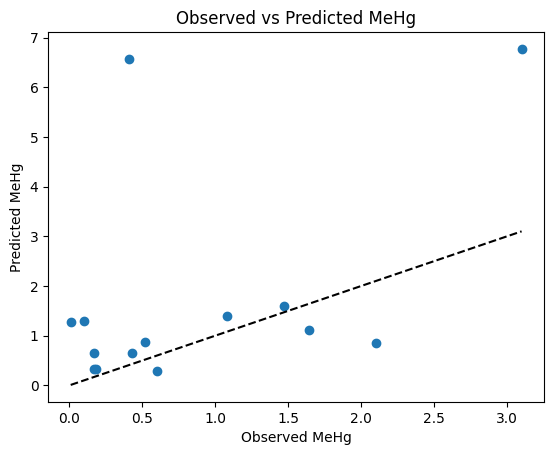

In [32]:
# Visualizing actual vs predicted data

plt.scatter(y_test, y_pred)
plt.xlabel('Observed MeHg')
plt.ylabel('Predicted MeHg')
plt.title('Observed vs Predicted MeHg')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()